# Regression

A regression is a predictive model that looks for a functional relationship between a set of variables (X) and a continuous outcome variable (y).

In other word, given an input array we try to predict a numerical value.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Weight - Height dataset

In [37]:
df = pd.read_csv('../data/weight-height.csv')

First visualize the dataset. Let's split male and female populations and plot them together (something new w.r.t what was done before) 

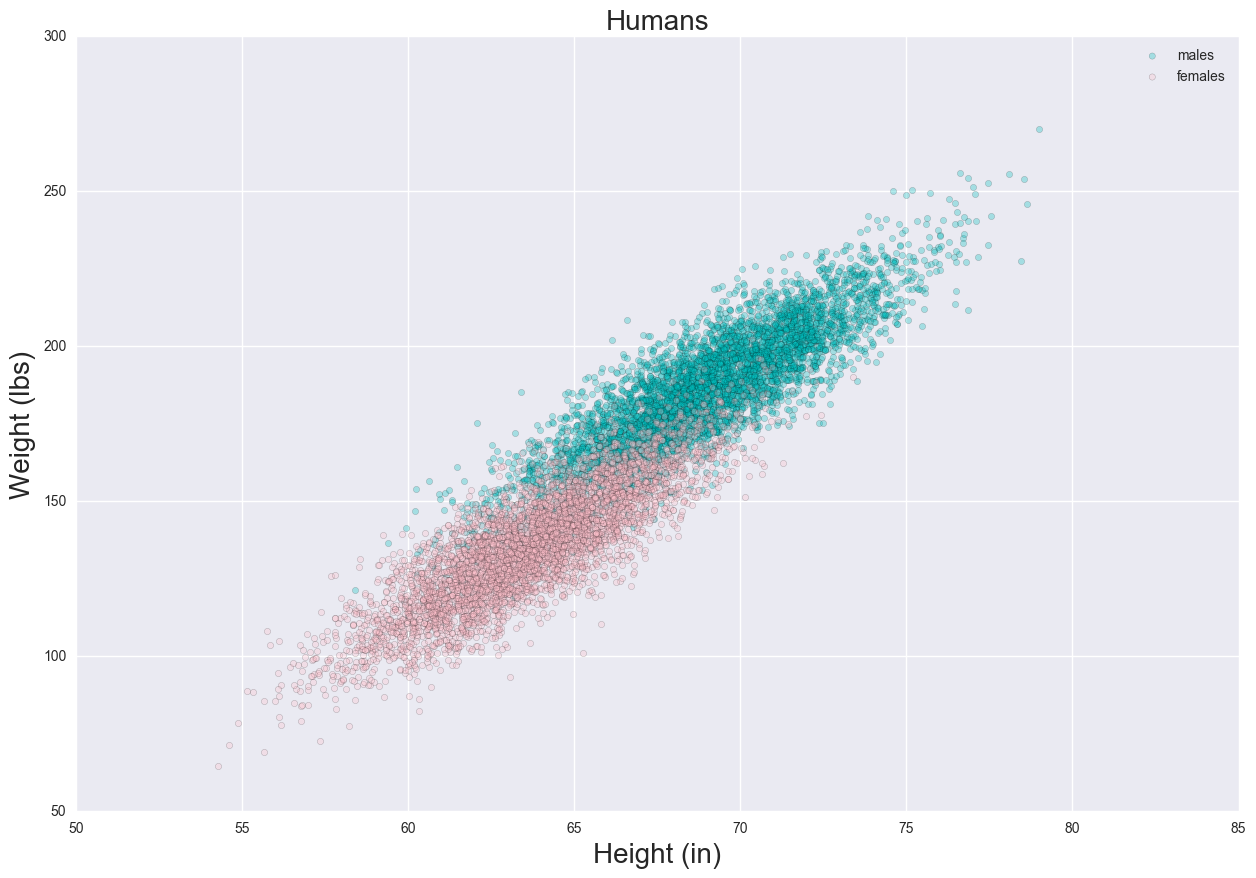

In [38]:
# males = df[df['Gender'] == 'Male']
# females = df[df['Gender'] == 'Female']

males = df.query('Gender == "Male"')
females = df.query('Gender == "Female"')

plt.figure(figsize=(15,10))
plt.scatter(males['Height'], males['Weight'], alpha = 0.3, label = 'males', c = 'c')
plt.scatter(females['Height'], females['Weight'], alpha = 0.3, label = 'females', c = 'pink')
plt.title('Humans', size = 20)
plt.xlabel('Height (in)', size = 20)
plt.ylabel('Weight (lbs)', size = 20)
plt.legend()

## Linear regression

Linear regression is the simplest functional form that one can imagine, where outcome and input are proportional to one another.

$$
y = \alpha + \beta x
$$

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
df.shape

(10000, 3)

In [45]:
type(df[['Height']])

pandas.core.frame.DataFrame

In [46]:
# Create instance of linear regression class
regr = LinearRegression()

In [47]:
# the x coordinate needs to have associated indeces in addition
# to the values, i.e. at least a 2 columns ndarray or a DataFrame;
# this is achieved by the either of the two following tricks:

# x = df['Height'].values[:,np.newaxis]
x = df[['Height']]

# the y coordinate is a 1 dimension array 
y = df['Weight']

In [49]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

###  Split the data to create training and test sets

In [50]:
# Create the indeces for the two sets
sample_leght = len(y)
indeces = range(sample_leght)
np.random.shuffle(indeces)
test_indeces = indeces[:sample_leght/5]
train_indeces = indeces[sample_leght/5:]

In [51]:
# Pick up the elements corresponding to the indeces
x_train = x.iloc[train_indeces]
x_test  = x.iloc[test_indeces]
y_train = y[train_indeces]
y_test  = y[test_indeces]

In [52]:
# Run the linear regression
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# The coefficients
print "Slope: %.2f" % regr.coef_
print "Intercept: %.2f" % regr.intercept_
#regr.coef_
regr.intercept_

Slope: 7.74
Intercept: -352.05


-352.04849223097528

In [57]:
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))

Residual sum of squares: 154.65


In [59]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_train, y_train))

Variance score: 0.86


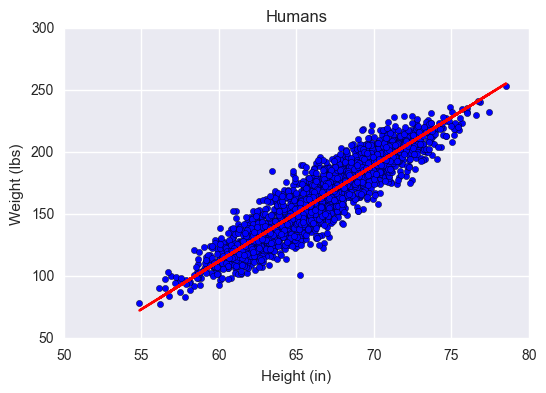

In [60]:
# Plot the results
plt.scatter(x_test, y_test)
plt.plot(x_test, regr.predict(x_test), color = 'red')
plt.title('Humans')
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')


## Housing prices dataset

This dataset contains multiple columns:
- sqft
- bdrms
- age
- price

Our goal is to build a model of price as a function of the other house attributes.

In [61]:
df = pd.read_csv('../data/housing-data.csv')

In [62]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


### Scatter matrix
The scatter matrix gives us an intuitive idea of how each variable is distributed and correlated to the other variables.

In [63]:
from pandas.tools.plotting import scatter_matrix

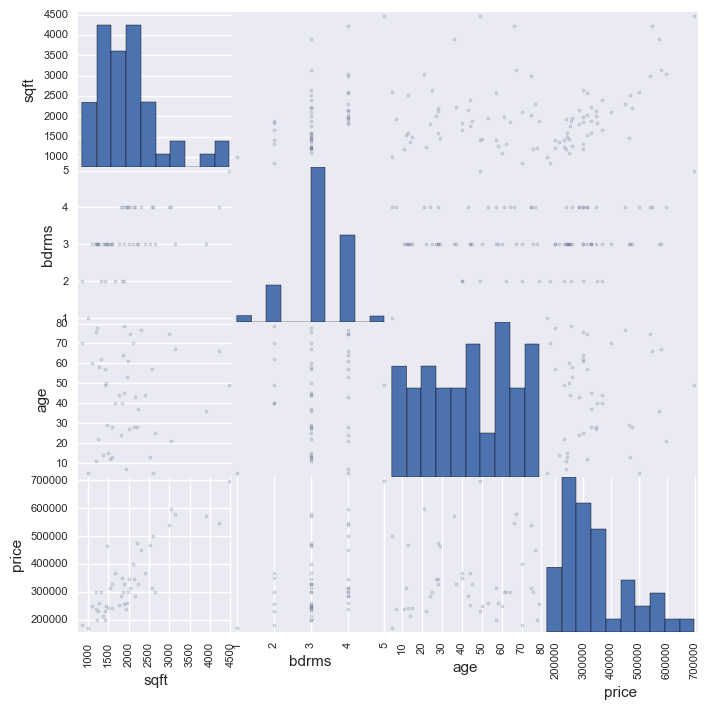

In [64]:
_  = scatter_matrix(df, alpha=0.2, figsize=(8, 8))

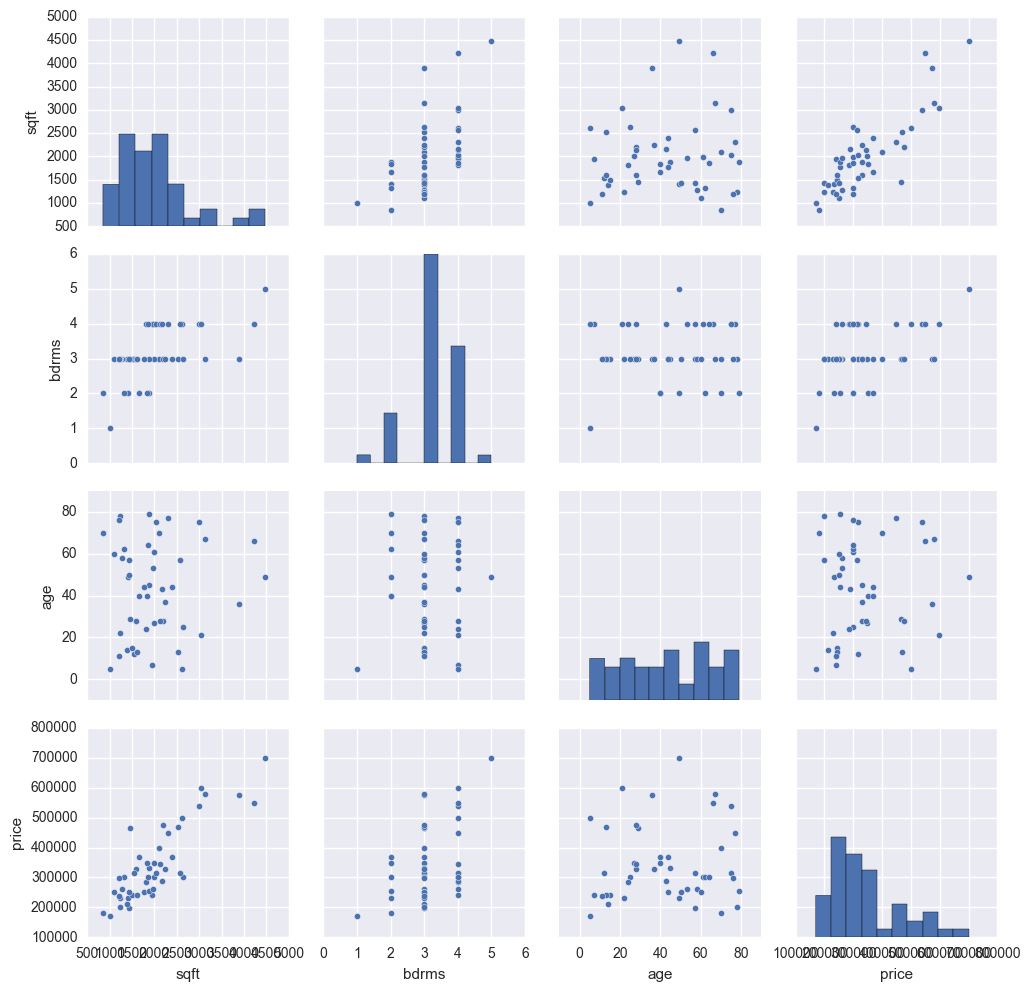

In [65]:
sns.pairplot(df)

Question: Is any trend apparent from the figure above?

## Linear regression (multiple variables)

$$
y = \alpha + \beta_0 x_0 + \beta_1 x_1 + ...
$$

In [66]:
regr = LinearRegression()

In [67]:
X = df[['sqft', 'bdrms', 'age']]
y = df['price']

In [69]:
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [70]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# the coef_ attribute is now an array of coefficients
regr.coef_

array([  139.33484671, -8621.47045953,   -81.21787764])

In [72]:
regr.intercept_

92451.627841645794

In [73]:
regr.score(X, y)

0.73316399906900243

In [79]:
regr.predict([[2000, 2, 30]])

array([ 351441.84401889])

## Nonlinear regression

Nonlinear regression is used when the functional relationship between input and output is more complex than a simple proportion rule.

What we do in this case is to create a linear combination of polynomial features, i.e. functions of higher powers of the input.

$$
y = \alpha + \beta_1 f(x) + \beta_2 f(x^2) + ... + \beta_n f(x^n)
$$

In [81]:
df = pd.read_json('../data/xy-regression.json')
line = pd.read_csv('../data/xy-function.csv')

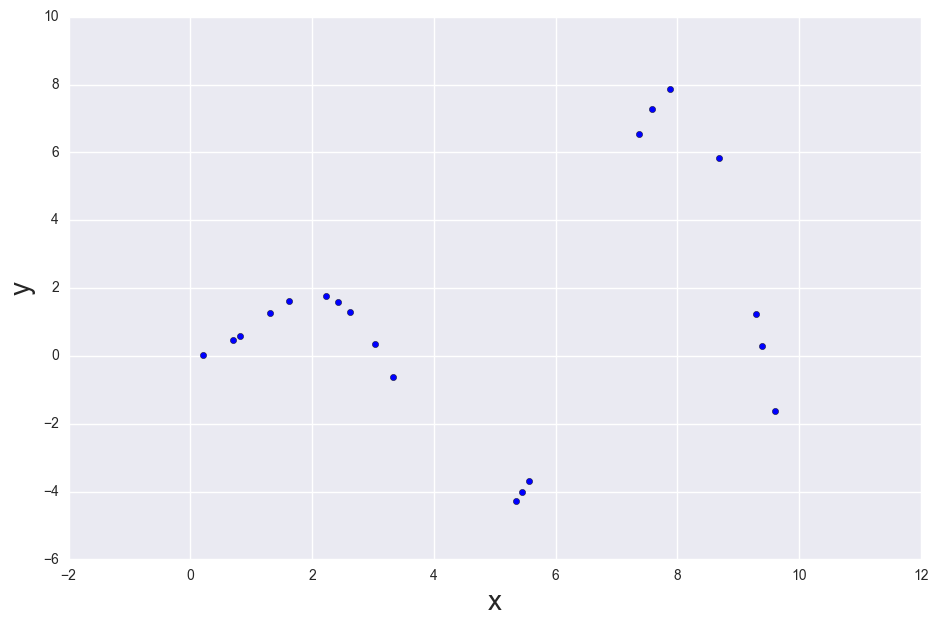

In [82]:
plt.figure(figsize=(11,7))
plt.scatter(df.x, df.y, label="training points")
plt.xlabel('x', size = 20)
plt.ylabel('y', size = 20)

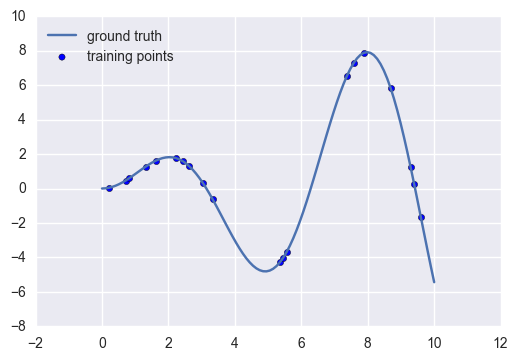

In [83]:
plt.scatter(df.x, df.y, label="training points")
plt.plot(line.x, line.y, label = "ground truth")

plt.legend(loc = 'best')

In [84]:
from sklearn.preprocessing import PolynomialFeatures


# convenient function that allows us to specify
# the maximum degree of polynomial features
# we intend to use
def poly_fit(degree = 3):
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(df.x.values[:, np.newaxis])
    line_ = poly.fit_transform(line.x.values[:, np.newaxis])
    clf = LinearRegression()
    clf.fit(X_, df.y)
    return clf, line_

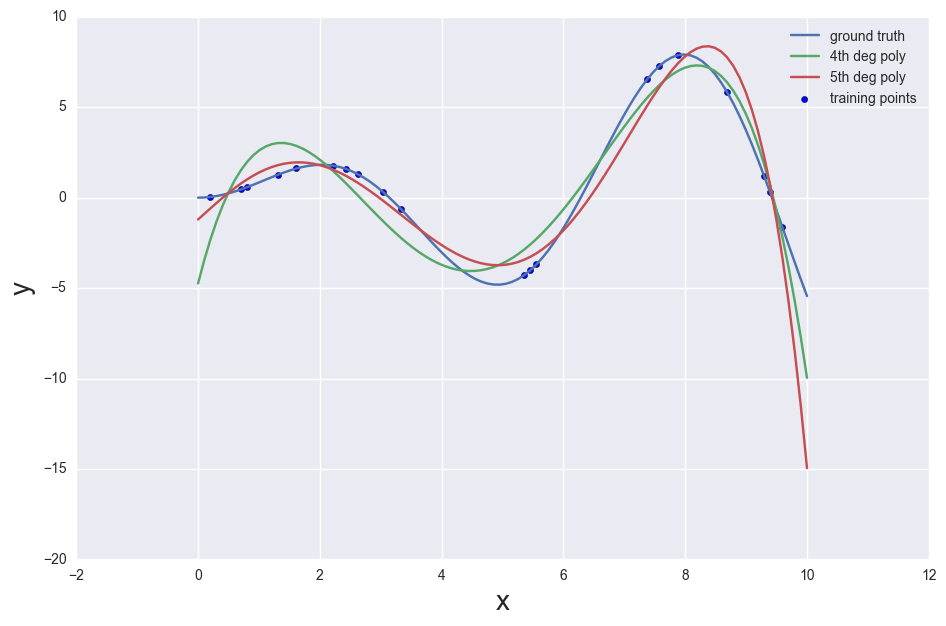

In [85]:
plt.figure(figsize=(11,7))

plt.scatter(df.x, df.y, label="training points")
plt.plot(line.x, line.y, label = "ground truth")


poly4, line_ = poly_fit(4)
plt.plot(line.x, poly4.predict(line_), label = "4th deg poly")

poly5, line_ = poly_fit(5)
plt.plot(line.x, poly5.predict(line_), label = "5th deg poly")

plt.xlabel('x', size = 20)
plt.ylabel('y', size = 20)
plt.legend(loc = 'best')

Exercises

compare regression from seaborn and sklearn

1)
- repeat the regression tasks with Ridge or Lasso regression (http://scikit-learn.org/stable/modules/linear_model.html)
- what changes?

2)
- load a different dataset and explore linear relations among features